In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler

In [3]:
dataset = pd.read_csv("../datasets/Position_Salaries.csv")
print(dataset.head())
print(dataset.describe())
x = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000
          Level          Salary
count  10.00000       10.000000
mean    5.50000   249500.000000
std     3.02765   299373.883668
min     1.00000    45000.000000
25%     3.25000    65000.000000
50%     5.50000   130000.000000
75%     7.75000   275000.000000
max    10.00000  1000000.000000


<AxesSubplot:>

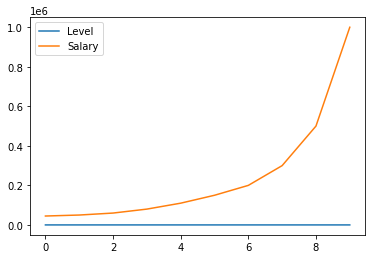

In [10]:
dataset.plot()

In [6]:
# Escalar variables
s_x = StandardScaler()
s_y = StandardScaler()
x = s_x.fit_transform(x)
y = s_y.fit_transform(y.reshape(-1,1))

In [7]:
reg_svr = SVR(kernel="rbf")
reg_svr.fit(x,y)

C:\Users\darub\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [11]:
# predecir nueva variable segun el modelo
y_predict = reg_svr.predict(s_x.transform([[6.5]]))
y_predict = s_y.inverse_transform(y_predict)
y_predict

array([170370.0204065])

In [15]:
#Crear lista de datos 
x_grid = np.arange(min(x), max(x), 0.1) 
x_grid = x_grid.reshape(len(x_grid), 1)
x_grid.shape

(32, 1)

In [22]:
fig = go.Figure([
    go.Scatter(x=s_x.inverse_transform(x).squeeze(), y=s_y.inverse_transform(y).squeeze(), name='Train', mode='markers'),
    go.Scatter(x=s_x.inverse_transform(x_grid).squeeze(), y=s_y.inverse_transform(reg_svr.predict(x_grid)).squeeze(), name='Prediction', mode='markers'),
])
fig.update_layout(template='plotly_dark')
fig.show()